In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import curve_fit

from root_to_np import get_tree, get_df, rename_tree_branches


Welcome to JupyROOT 6.26/04
END OF SCRIPT


In [2]:
run = [630,636]
pad_name = [37,38,27,28]
centers_from_fit = np.loadtxt('/home/evridiki/Desktop/JULY_RUNS/run_627_632_info/pad_centers.txt',
                delimiter=" ", unpack=False)


In [3]:
data = []
for irun in run:
    tree = get_tree(irun)
    
    var_indexes = np.array([1,2,4,5,6,7])
    for index in range(4):
        var_indexes = np.append(var_indexes,[index*10+8,index*10+9,index*10+12,index*10+14,index*10+11]) 
    var_indexes = np.append(var_indexes,[67,65,66])
    
    data_single = get_df(tree,*var_indexes)
    
    old_names = ['mcp_gpeak','mcp_qall','mcp_t']
    new_names = ['mcp1_gpeak','mcp1_qall','mcp1_t']
    names = [old_names,new_names]
    data_single = rename_tree_branches(data_single,*names)
    
    print(len(data_single))
    data.append(data_single)

data = pd.concat(data)
print(data.head())
print(len(data))

['Pico;1']
['srs', 'mcp_gpeak', 'mcp_qall', 'mcp_tnaive', 'mcp_t', 'mcp2_gpeak', 'mcp2_qall', 'mcp2_t', 'mm1_gpeak', 'mm1_qall', 'mm1_tnaive', 'mm1_t', 'mm1_qe', 'mm1_pl3', 'mm1_qfit', 'mm1_xh', 'mm1_qh', 'mm1_gmin', 'mm2_gpeak', 'mm2_qall', 'mm2_tnaive', 'mm2_t', 'mm2_qe', 'mm2_pl3', 'mm2_qfit', 'mm2_xh', 'mm2_qh', 'mm2_gmin', 'mm3_gpeak', 'mm3_qall', 'mm3_tnaive', 'mm3_t', 'mm3_qe', 'mm3_pl3', 'mm3_qfit', 'mm3_xh', 'mm3_qh', 'mm3_gmin', 'mm4_gpeak', 'mm4_qall', 'mm4_tnaive', 'mm4_t', 'mm4_qe', 'mm4_pl3', 'mm4_qfit', 'mm4_xh', 'mm4_qh', 'mm4_gmin', 'nmm1_x', 'mm1_x', 'nmm1_y', 'mm1_y', 'nmm2_x', 'mm2_x', 'nmm2_y', 'mm2_y', 'nmm3_x', 'mm3_x', 'nmm3_y', 'mm3_y', 'nmm4_x', 'mm4_x', 'nmm4_y', 'mm4_y', 'ntracks', 'xy', 'chi2', 'track_flag', 'ndetsintrack', 'distnextcluster']
<Report start=0 stop=4538 source='/home/evridiki/Downloads/test_run630.root:/Pico;1'>
<Report start=4538 stop=9076 source='/home/evridiki/Downloads/test_run630.root:/Pico;1'>
<Report start=9076 stop=13614 source='/home

<Report start=154326 stop=158865 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=158865 stop=163404 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=163404 stop=167943 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=167943 stop=172482 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=172482 stop=177021 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=177021 stop=181560 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=181560 stop=186099 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=186099 stop=190638 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=190638 stop=195177 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
<Report start=195177 stop=199350 source='/home/evridiki/Downloads/test_run636.root:/Pico;1'>
199350
   mcp1_gpeak  mcp1_qall      mcp1_t  mcp2_gpeak  mcp2_qall    

# MCP

In [4]:
mcp_color = ['black','red']

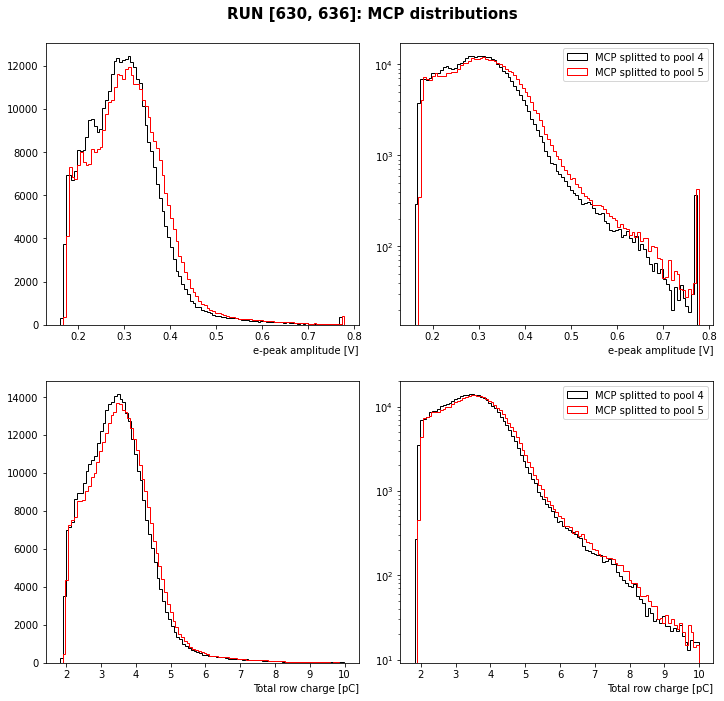

In [5]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(hspace=0.2)
fig.suptitle(f'RUN {run}: MCP distributions', fontsize=15, fontweight='bold')


for which_mcp in range(2):
    mcp_gpeak = f'mcp{which_mcp+1}_gpeak'
    mcp_qall = f'mcp{which_mcp+1}_qall'
    
    v_limits = data[mcp_gpeak]>0
    q_limits = (data[mcp_qall]>0)*(data[mcp_qall]<10)
    
    ax = axes[0][0]
    ax.hist(data[mcp_gpeak][v_limits], bins =100, 
            color = mcp_color[which_mcp], histtype='step')
    ax.set_xlabel('e-peak amplitude [V]',loc='right')
    ax.grid()
    ax = axes[0][1]
    ax.hist(data[mcp_gpeak][v_limits], bins =100, label =f'MCP splitted to pool {4+which_mcp}',
            color = mcp_color[which_mcp], histtype='step')
    ax.set_xlabel('e-peak amplitude [V]',loc='right')
    ax.grid()
    ax.legend()
    ax.set_yscale('log')

    ax = axes[1][0]
    ax.hist(data[mcp_qall][q_limits], bins =100,
            color = mcp_color[which_mcp], histtype='step')
    ax.set_xlabel('Total row charge [pC]',loc='right')
    ax.grid()
    ax = axes[1][1]
    ax.hist(data[mcp_qall][q_limits], bins =100, label =f'MCP splitted to pool {4+which_mcp}',
            color = mcp_color[which_mcp], histtype='step')
    ax.set_xlabel('Total row charge [pC]',loc='right')
    ax.set_yscale('log')
    ax.legend()
    ax.grid()

plt.show()

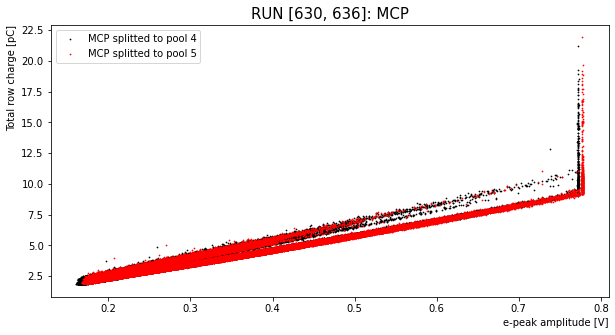

In [6]:
plt.rcParams['figure.figsize'] = [10, 5]

for which_mcp in range(2):
    mcp_gpeak = f'mcp{which_mcp+1}_gpeak'
    mcp_qall = f'mcp{which_mcp+1}_qall'
    
    v_limits = data[mcp_gpeak]>0
    q_limits = (data[mcp_qall]>0)*(data[mcp_qall]<10)
    plt.scatter(data[mcp_gpeak][v_limits], data[mcp_qall][v_limits],
                label =f'MCP splitted to pool {4+which_mcp}',color=mcp_color[which_mcp],s=0.5)
    
plt.title(f'RUN {run}: MCP', fontsize=15, color= 'black');
plt.xlabel('e-peak amplitude [V]', loc = 'right')
plt.ylabel('Total row charge [pC]', loc = 'top')
plt.legend(prop={'size': 10})

plt.show()

# PADS

In [7]:
#define the cuts
mm_basic_cut= []

mcp_overflow = np.logical_and((data.mcp1_gpeak>0.)*(data.mcp1_gpeak<=0.72),
                             (data.mcp2_gpeak>0.)*(data.mcp2_gpeak<=0.72))
chi2_cut = (data.chi2<=40)*(data.track_flag>0)
mcp_basic_cut = mcp_overflow*chi2_cut

for index in range(4):
    pad = index+1
       
    mm_gpeak = f'mm{pad}_gpeak'
    mm_qall = f'mm{pad}_qall'
    mm_qe = f'mm{pad}_qe'
    mm_qfit = f'mm{pad}_qfit'
    mm_overflow = (data[mm_gpeak]>0.01)*(data[mm_gpeak]<0.36)*(data[mm_qe]>0)
    qe_line = (data[mm_qe]>30.*data[mm_gpeak])
    cut = np.logical_and(mm_overflow*mcp_basic_cut,qe_line)
    
    mm_basic_cut.append(cut)

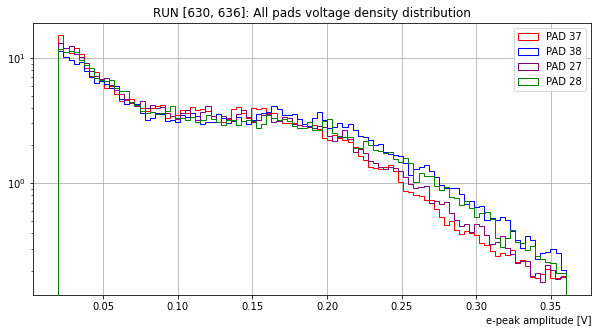

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
color = np.array(['red','blue','purple','green'])

for index in range(4):
    pad = index+1
    mm_gpeak = f'mm{pad}_gpeak'
    ax.hist(data[mm_gpeak][mm_basic_cut[index]*data[mm_gpeak]>0.02], bins =100, 
            color = color[index], histtype='step',label = f'PAD {pad_name[index]}',density=True)

ax.set_xlabel('e-peak amplitude [V]',loc='right')
ax.grid()
ax.legend()
ax.set_yscale('log')
ax.set_title(f'RUN {run}: All pads voltage density distribution')

plt.show()

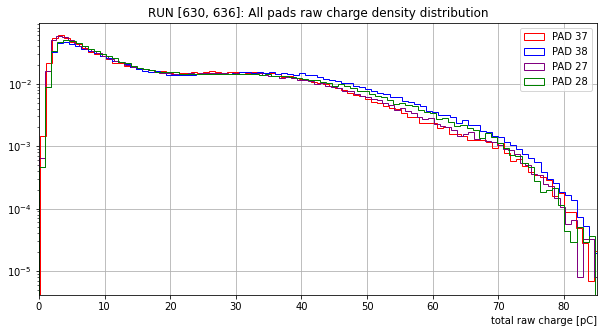

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

for index in range(4):
    pad = index +1
    mm_qall = f'mm{pad}_qall'
    ax.hist(data[mm_qall][np.logical_and(mm_basic_cut[index],
                                      data[mm_gpeak]>0.)*np.logical_and(data[mm_qall]>0.,data[mm_qe]<80.)], 
            bins =100, color = color[index], histtype='step',label = f'PAD {pad_name[index]}',density=True)

ax.set_xlabel('total raw charge [pC]',loc='right')
ax.grid()
ax.legend()
ax.set_yscale('log')
ax.set_xlim(0,85)
ax.set_title(f'RUN {run}: All pads raw charge density distribution')

plt.show()

# TRACKS

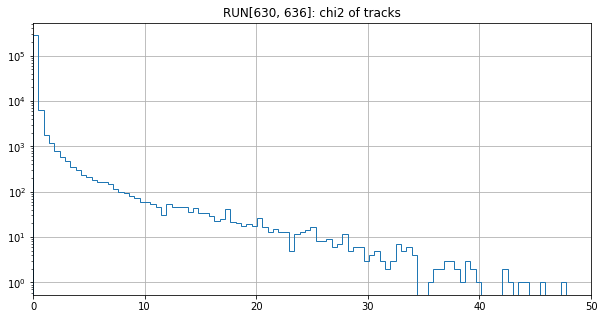

373228
295702


In [10]:
plt.hist(data.chi2[data.track_flag>0],bins = 100,histtype='step')
plt.title(f'RUN{run}: chi2 of tracks')
plt.xlim(0,50)
plt.yscale('log')
plt.grid()
plt.show()
print(len(data.chi2))
print(len(data.chi2[data.track_flag>0]))

In [11]:
%jsroot on

In [12]:
c = ROOT.TCanvas()

xytrks = ROOT.TH2F("xytrks",f'RUN {run}: All tracks multiplicity',100,0,50,100,0,50)

xytrks.GetXaxis().SetTitle("x [mm]")
xytrks.GetYaxis().SetTitle("y [mm]")

n = len(data[mcp_basic_cut])
x = data.iloc[:,-4][mcp_basic_cut].values
y = data.iloc[:,-3][mcp_basic_cut].values
w = np.ones(n)
xytrks.FillN(n,x,y,w)
 
xytrks.Draw("colz")
c.Draw()

In [13]:
for i in range(xytrks.GetNbinsX()+1):
    for j in range(xytrks.GetNbinsY()+1):
        if xytrks.GetBinContent(i,j)<15:
            xytrks.SetBinContent(i,j,0)

xytrks.SetTitle(f'RUN{run}: xy tracks with multiplicity >15')
xytrks.Draw("colz")

c.Draw()

In [14]:
c.Clear()
c.Divide(2,2)

xytrksW = []

for which_mcp in range(2):
    h = ROOT.TH2F(f'xyW_mcp{which_mcp+1}',f'RUN {run}: xy tracks weighted by MCP(in pool{4+which_mcp}) charge',
                        100,0,50,100,0,50)
    h.GetXaxis().SetTitle("x [mm]")
    h.GetYaxis().SetTitle("y [mm]")

    w = data.iloc[:,3*which_mcp+1][mcp_basic_cut].values
    h.FillN(n,x,y,w)

    h.Divide(xytrks)
    xytrksW.append(h)
    
    c.cd(2*which_mcp+1)
    xytrksW[which_mcp].Draw("lego2z")
    c.cd(2*which_mcp+2)
    xytrksW[which_mcp].Draw("colz")
    
c.Draw()

In [15]:
c.Clear()
xytrksW[0].Draw("lego2z") 

c.Draw()

In [16]:
xytrksW[0].Draw("colz") 

c.Draw()

## IN THIS AREA MCP COLLECTS CHARGE IN A UNIFORM WAY

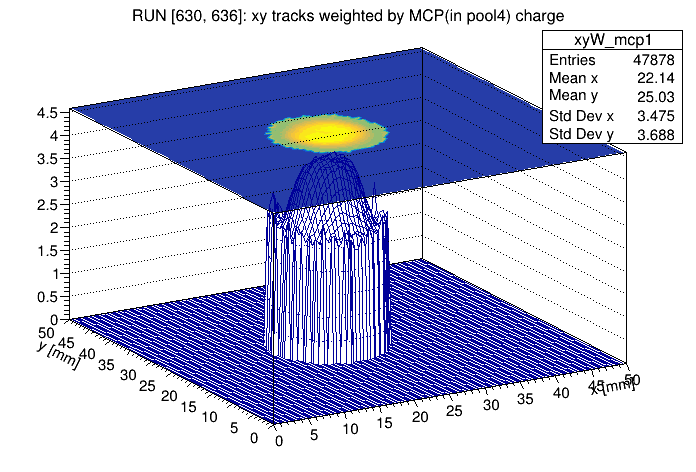

In [17]:
%jsroot off
xytrksW[0].Draw("surf3")
c.Draw()

## to find the pads

In [18]:
# we find the pads here!
xytrksW_mm = []
pad_hist = []

for index in range(4):
    pad = index +1
    
    h1 = ROOT.TH2F(f'xytrksW{pad}',f'RUN{run}: xy tracks weighted by PAD {pad_name[index]} total raw charge',
                   100,0,50,100,0,50)
    h1.GetXaxis().SetTitle("x")
    h1.GetYaxis().SetTitle("y")

    n = len(data[mm_basic_cut[index]])
    x = data.iloc[:,-4][mm_basic_cut[index]].values
    y = data.iloc[:,-3][mm_basic_cut[index]].values
    w = data.iloc[:,7+index*5][mm_basic_cut[index]].values
    h1.FillN(n,x,y,w)
    
    h1.Divide(xytrks)
    
    xytrksW_mm.append(h1)
    
    h2 = h1.Clone()
    h2.SetName(f'pad{pad}_hist')
    h2.SetTitle(f' PAD {pad_name[index]}')
    for i in range(h2.GetNbinsX()+1):
        for j in range(h2.GetNbinsY()+1):
            if h2.GetBinContent(i,j)<2.:
                h2.SetBinContent(i,j,0)
    
    pad_hist.append(h2)

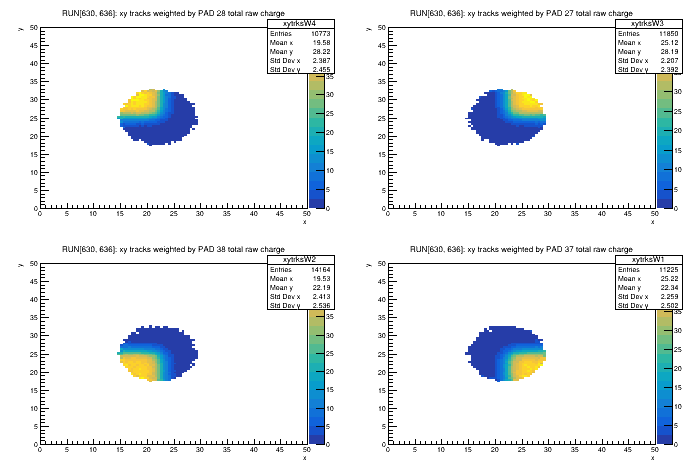

In [19]:
c.Clear()
c.Divide(2,2)

for i in range(4):
    c.cd(i+1)
    xytrksW_mm[3-i].Draw("colz")#"lego2z"



c.Draw()

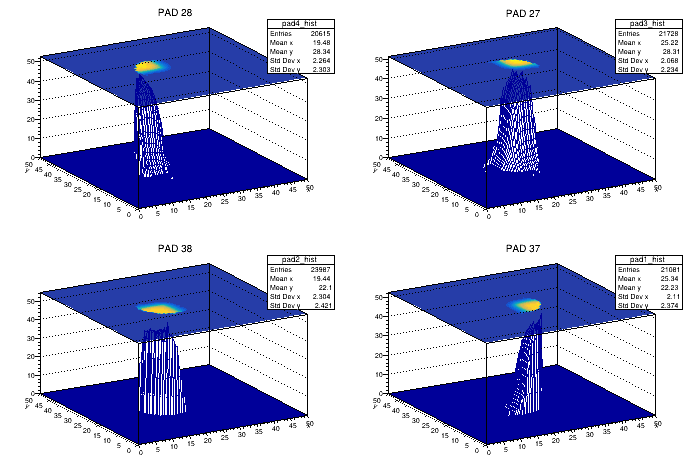

In [20]:
c.Clear()
c.Divide(2,2)

for i in range(4):
    c.cd(i+1)
    pad_hist[3-i].Draw("surf3")#pad_hist[i].Draw("lego")



c.Draw()

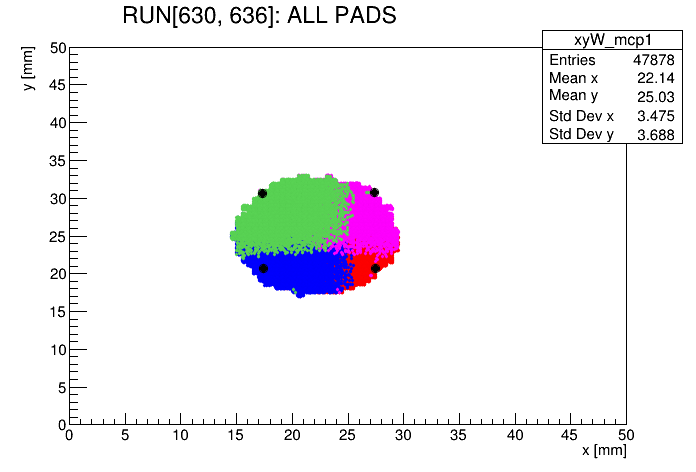

In [21]:
c.Clear()
l = c.GetListOfPrimitives()


test_gr = ROOT.TPolyMarker(4,centers_from_fit[0],centers_from_fit[1])
test_gr.SetMarkerStyle(8)
test_gr.SetMarkerSize(1)
test_gr.SetMarkerColor(1)


xytrksW[0].SetLineColor(1)
xytrksW[0].Draw()

for index in range(4):
    pad = index+1
    
    pad_hist[index].SetMarkerColor(2*pad)
    pad_hist[index].SetMarkerStyle(8)
    pad_hist[index].SetMarkerSize(0.25)
    pad_hist[index].SetLineColor(2*pad)
    
    pad_hist[index].SetStats(0)
    pad_hist[index].Draw("same")




test_gr.Draw("same")
c.Update()

l[1].SetTitle(f'RUN{run}: ALL PADS') # l[0] is TFrame
#l.Remove(l.FindObject("title"))

c.Update() # will recreate title
c.Draw()

In [22]:
# scale_p3=scale_p3/10
# scale_p = np.concatenate((scale_p2.reshape(4,1), scale_p3.reshape(4,1)),axis=1)
# print(scale_p)
# with open(f'/home/evridiki/Desktop/JULY_RUNS/run_{run[0]}_{run[1]}_info/scale_par.txt', 'w') as f:
#      np.savetxt(f,scale_p)

## double gaussian to the central tracks in order to find mu

In [23]:
def double_gaus( x, *params ):
    (c1, mu, sigma1, c2, sigma2) = params
    res =   c1 * np.exp( - (x - mu)**2.0 / (2.0 * sigma1**2.0) ) \
          + c2 * np.exp( - (x - mu)**2.0 / (2.0 * sigma2**2.0) )
    return res
def simple_gaus(x,c,mu,sigma):
    res =   c * np.exp( - (x - mu)**2.0 / (2.0 * sigma**2.0) ) 
    return res

-7588.646022055227    0.15668067733051028
-7610.585703393929    0.11873053198086819
-8950.516379383693    0.13482676900669865
-8170.723113861533    0.16260374112690967


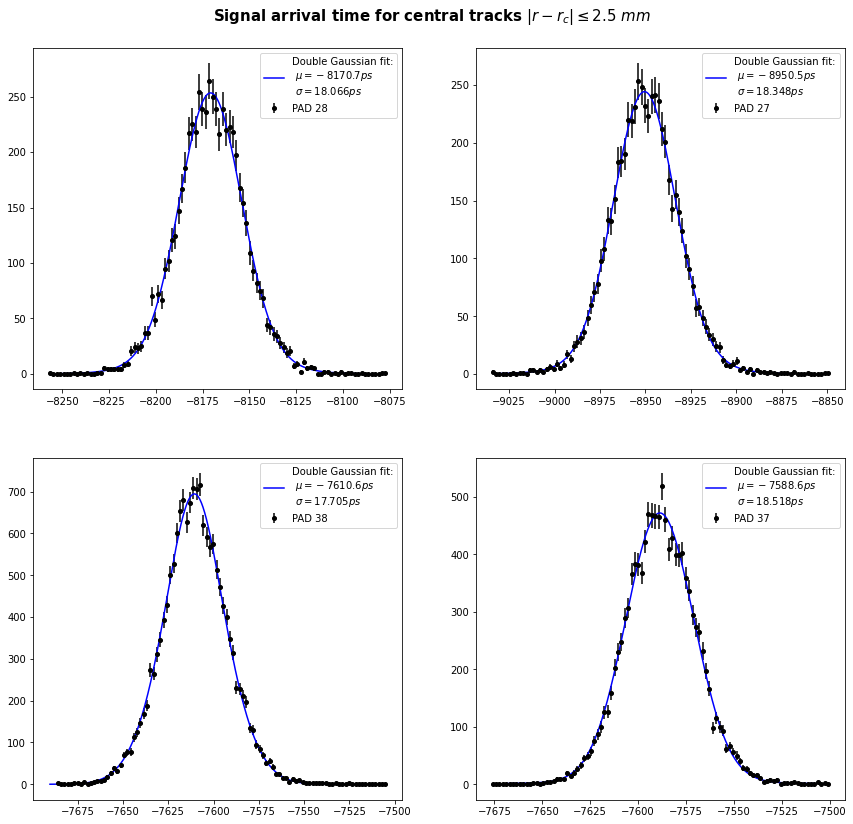

In [24]:
fig,axes = plt.subplots(figsize=(12,12))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(hspace=0.2)
fig.suptitle(r'Signal arrival time for central tracks $|r-r_c|\leq 2.5\ mm$', fontsize=15, fontweight='bold')

cable_delay=[None]*4

for index in range(4):
    pad=index+1
    mm_gpeak = f'mm{pad}_gpeak'
    mm_qe = f'mm{pad}_qe'
    mm_t = f'mm{pad}_t'
    mcp_t='mcp1_t'
    if(pad>2):
        mcp_t='mcp2_t'
    
    xc = centers_from_fit[0][index]
    yc = centers_from_fit[1][index]
    
    circle_cut = np.sqrt((data.iloc[:,-4]-xc)**2 + (data.iloc[:,-3]-yc)**2)<2.5
    mm_time_cut = mm_basic_cut[index]*(data[mm_gpeak]>0.03)*circle_cut

    sat = (data[mm_t][mm_time_cut] - data[mcp_t][mm_time_cut])*1000 #ps
    mean = np.average(sat,weights = np.abs(1/(sat-sat.mean())))
    sat = sat[np.abs(sat-mean)<=100] # times waaay out of range

    counts, edges = np.histogram(sat,bins=100)
    bin_centers = (edges[:-1] + edges[1:])/2
    y_errors = np.sqrt(counts)

    g2_par = np.array([350.,sat.mean(),10,50,30])

    param_bounds=([0.1,-np.inf,1,0.1,1],[np.inf,np.inf,np.inf,np.inf,np.inf])

    popt, pcov = curve_fit(double_gaus, bin_centers, counts, p0=g2_par, bounds = param_bounds)
    g2_par= popt
    
    plt.subplot(2, 2, 4-index)
    plt.errorbar(bin_centers, counts, yerr=y_errors, fmt='o',markersize=4.,
                color='black',label= f'PAD {pad_name[index]}')

    x = np.linspace(sat.mean()-80,sat.mean()+80,1600)
    prob =  double_gaus(x,*g2_par)/double_gaus(x,*g2_par).sum()
    mu_double   = x.dot(prob)         # mean value
    mom2 = np.power(x, 2).dot(prob)  # 2nd moment
    var  = mom2 - mu_double**2        # variance
    sigma_double = np.sqrt(var) 
    
    plt.plot(x,double_gaus(x,*g2_par),color='blue',
         label='Double Gaussian fit:\n $\mu = {:.1f} ps$ \n $\sigma = {:.3f} ps$'.format(g2_par[1],sigma_double))
    plt.legend(loc='upper right')
    print(g2_par[1],'  ',np.sqrt(pcov[1,1]))
    cable_delay[index] = g2_par[1]
plt.show()

In [25]:
with open(f'/home/evridiki/Desktop/JULY_RUNS/run_{run[0]}_{run[1]}_info/cable_delay.txt', 'w') as f:
    np.savetxt(f,cable_delay)